### BADASS Analysis - can we tell the difference between amino acids, sugars, lipids and nucleobases?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Fatty acids data (excluding farnesol (F) and geraniol (G))

In [3]:
fa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex', 'Hex2',
                  'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/All_small_molecules/FA_results/',
    control_peptides=['GRP35'],
    control_analytes=['F', 'G']
)

Directory Analysis/Standard_array/All_small_molecules/FA_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/All_small_molecules/FA_results/?y


Amino acids data

In [4]:
aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/All_small_molecules/AA_results/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/All_small_molecules/AA_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/All_small_molecules/AA_results/?y


Nucleobase and Nucleoside data

In [5]:
nn_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/All_small_molecules/NN_results/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/All_small_molecules/NN_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/All_small_molecules/NN_results/?y


Sugar data

In [6]:
sugar_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/All_small_molecules/Sugar_results/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/All_small_molecules/Sugar_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/All_small_molecules/Sugar_results/?y


Locate xlsx files

In [7]:
fa_fluor_data.group_xlsx_repeats()

In [8]:
aa_fluor_data.group_xlsx_repeats()

In [9]:
nn_fluor_data.group_xlsx_repeats()

In [10]:
sugar_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [11]:
fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/F_G_M_P_S_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/A_L_N_Ol_Pol_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/B_D_DD_H_O_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/B_D_DD_H_O_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/A_L_N_Ol_Pol_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/F_G_M_P_S_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/B_D_DD_H_O_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_D

Have checked data for Ol + GRP52 on plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/FAs/Reformatted_FA_csvs/A_L_N_Ol_Pol_repeat_7.xlsx - the average fluorescence of Ol + DPH is slightly higher than that of Ol + GRP52 + DPH, but not concerningly so - the values are very similar, just indicates that Ol displaces effectivly all of the DPH from barrel GRP52.

In [12]:
aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/S_T_V_W_Y_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfs

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_16.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_16.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_16.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/S_T_V_W_Y_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek

In [13]:
nn_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_4.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson

In [14]:
sugar_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_19.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_19.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_19.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/fru_glu_mal_man_repeat_20.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/acetilglu_gal_gluhcl_xyl_repeat_20.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/Sugars/Reformatted_sugar_csvs/a-gal_a-glu_b-gal_b-glu_repeat_20.xlsx


Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [15]:
fa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: M, 1 (flagged readings = GRP52: 0.14845257933411007, Hex: 0.17339789341803608) 
 Outlier excluded from final output dataset: A, 3 (flagged readings = GRP52: 0.017910495910393443) 


In [16]:
aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: K, 1 (flagged readings = GRP52: 0.29757286450610754) 
 Outlier excluded from final output dataset: K, 17 (flagged readings = GRP63: 0.5951184502146847) 
 Outlier excluded from final output dataset: M, 17 (flagged readings = GRP51: 0.19689601888743802, GRP63: 0.5625428485094688, 24D: 0.35516563266965606, 24K: 0.6449913762548711) 
 Outlier excluded from final output dataset: L, 6 (flagged readings = GRP22: 0.22627278442365606) 
 Outlier excluded from final output dataset: L, 17 (flagged readings = GRP51: 0.22965645203995622, GRP63: 0.5967105525837282, GRP80: 0.22200324897544688, 24D: 0.3134777508445791, 24K: 0.7177998817159315) 
 Outlier excluded from final output dataset: Q, 19 (flagged readings = GRP63: 0.09220826199202847) 
 Outlier excluded from final output dataset: Q, 9 (flagged readings = Hept: 0.23165883589692815) 
 Outlier excluded from final output dataset: Y, 2 (flagged readings = GRP52: 0.18604365383593835) 
 Outlier excluded from 

In [17]:
nn_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: T, 5 (flagged readings = 17K: 2.059230814095656) 
 Outlier excluded from final output dataset: T, 12 (flagged readings = 17K: 1.3274076368867866) 
 Outlier excluded from final output dataset: As, 3 (flagged readings = GRP80: 0.21625497675837502) 
 Outlier excluded from final output dataset: As, 2 (flagged readings = 24K: 0.1344720189438957) 
 Outlier excluded from final output dataset: G, 0 (flagged readings = 17K: 0.5391977300191986) 


In [18]:
sugar_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: gluhcl, 2 (flagged readings = GRP46: 0.17476258673804612) 
 Outlier excluded from final output dataset: a-glu, 5 (flagged readings = GRP22: 0.267674176007497, GRP46: 0.43288129594632097, Hept: 0.22617613515901835) 
 Outlier excluded from final output dataset: mal, 8 (flagged readings = GRP63: 0.19897314122952303, 24K: 0.29576914601025717) 
 Outlier excluded from final output dataset: b-glu, 5 (flagged readings = GRP22: 0.2903340223877868) 
 Outlier excluded from final output dataset: glu, 8 (flagged readings = GRP63: 0.47368051944584666, GRP80: 0.39458870953589364, 24K: 0.5126683776953226, 17K: 0.46959749833782394) 
 Outlier excluded from final output dataset: a-gal, 5 (flagged readings = GRP46: 0.5948016045143236) 
 Outlier excluded from final output dataset: a-gal, 1 (flagged readings = Hex: 0.350322026701514) 
 Outlier excluded from final output dataset: man, 8 (flagged readings = GRP63: 0.4679357651389915, GRP80: 0.35412059810827645, 24K

In [19]:
fa_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.010280,0.580205,0.172238,0.005638,0.012435,0.088366,0.043985,0.058032,0.125903,0.904267,0.084635,0.049251,0.024952,2.554502,S
1,0.013719,0.747611,0.240082,0.006044,0.015650,0.124435,0.075538,0.075261,0.091031,0.621184,0.108818,0.065596,0.040387,1.630325,S
2,0.014406,0.640854,0.191321,0.005622,0.014030,0.110440,0.065028,0.069179,0.090474,0.629358,0.092592,0.053827,0.029239,2.172177,S
3,0.013126,0.545265,0.246404,0.004702,0.014268,0.131268,0.063571,0.072775,0.076215,0.522981,0.158579,0.090742,0.033120,1.550490,S
4,0.012959,0.627379,0.178021,0.005042,0.012005,0.105954,0.056017,0.062515,0.119440,0.844979,0.079496,0.043029,0.030520,2.488372,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.036639,3.233508,0.028616,0.005059,0.054151,0.179918,0.223976,0.116039,0.085909,0.218148,0.037687,0.073139,0.013665,0.167173,A
98,0.046324,4.394172,0.055736,0.008266,0.074237,0.358657,0.370359,0.145710,0.085863,0.435751,0.060264,0.078067,0.021654,0.279570,A
99,0.106239,3.906800,0.024741,0.008609,0.043952,0.203499,0.214139,0.187995,0.067024,0.154344,0.022183,0.023346,0.010078,0.158689,A
100,0.095591,3.739783,0.029184,0.005750,0.091397,0.189131,0.272887,0.161840,0.066086,0.172303,0.024267,0.032306,0.010180,0.103804,A


In [20]:
aa_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.960044,0.914414,1.035442,1.006085,0.921934,0.892149,0.958837,0.987714,0.919845,0.953572,0.925659,0.925381,0.925314,0.893984,D
1,1.011238,1.026439,0.990621,0.947435,0.999285,0.940184,0.953198,0.976838,0.847322,0.942345,0.882146,0.989214,1.013787,1.052363,D
2,0.939373,0.956290,0.948398,0.994489,1.004922,0.938085,0.953658,0.984652,0.882216,0.949966,0.904538,0.926171,1.018195,0.952282,D
3,0.986827,0.911546,0.991804,0.941088,0.985442,0.915220,1.023224,0.981118,0.970954,1.002847,0.912162,0.911963,0.995048,1.173381,D
4,1.028349,0.906381,1.010761,0.977501,0.961735,0.880132,1.049149,0.994104,0.921686,0.991111,0.921878,0.878730,1.065896,0.931143,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.971991,0.924176,0.986254,0.981147,1.020960,0.838378,0.976825,0.954409,1.082455,0.963613,0.924151,0.962762,0.963271,0.968742,F
383,0.937319,0.872759,0.951456,0.970218,0.965141,1.083452,0.967741,0.977143,0.959280,0.968600,0.874327,0.891308,0.916438,0.861623,F
384,0.967380,1.107780,1.003831,0.960234,0.967088,0.942696,0.967473,0.933266,0.863425,0.994560,0.921323,0.944993,0.891701,1.083333,F
385,0.983017,0.920607,0.997501,1.006897,1.005817,0.990447,1.020085,1.004844,1.007374,0.957582,0.932152,0.969884,0.975035,1.008832,F


In [21]:
nn_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.854868,1.204770,1.000226,1.002539,0.995212,1.043867,0.989404,0.776813,1.035186,0.903371,1.040798,0.998250,1.001610,1.099541,Gs
1,1.085534,1.185885,1.023785,1.028803,1.004943,1.028625,0.989176,0.845174,1.005565,1.008389,1.030340,0.994280,0.925785,0.985373,Gs
2,0.877351,1.213187,0.951034,0.989869,0.977261,1.143010,0.936915,0.731694,0.723681,0.806318,0.923117,0.995051,0.938989,1.280340,Gs
3,0.913440,1.146179,0.961362,0.994157,0.984571,1.034262,0.959986,0.704859,0.785635,0.895788,1.026635,1.009127,1.003110,1.239914,Gs
4,0.936458,1.275000,0.984422,1.027883,1.003493,1.054661,1.001907,0.824850,1.010608,0.989512,0.990474,0.998395,0.932450,1.105794,Gs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.035959,1.250000,1.009088,1.018089,1.007102,0.745727,0.983160,1.015876,1.088523,1.029226,0.939937,0.949299,0.981536,1.156559,G
151,1.000992,1.036855,0.987502,1.002050,0.983877,0.989431,0.960809,0.929198,0.986657,0.956744,0.984650,0.968941,0.986992,1.049575,G
152,0.976257,0.900061,0.975034,0.983114,0.994132,0.990633,0.922653,0.950447,1.002103,0.993325,0.958959,1.019413,0.960884,0.973684,G
153,1.009619,1.046243,0.974669,0.969705,1.010138,0.919565,0.938360,0.840337,1.022094,0.987322,0.917919,0.917284,0.980646,0.997306,G


In [22]:
sugar_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.006916,1.049553,0.989048,0.992540,0.996426,1.035119,0.941960,0.955559,1.030651,1.017196,1.007881,0.997831,0.962611,0.952645,xyl
1,0.968052,1.015837,0.986726,0.986919,1.017776,0.956922,1.013281,0.986603,0.984784,1.033400,0.985406,0.992458,0.960634,0.999660,xyl
2,0.998994,1.038938,0.986370,0.995560,1.046103,0.986418,0.987574,0.982142,1.087830,0.964193,1.020265,1.014667,1.023237,1.019849,xyl
3,1.021008,1.004822,0.983983,0.988496,0.972524,0.912017,1.028916,0.988515,1.050805,1.009780,0.979146,0.983240,0.982742,1.004965,xyl
4,1.050376,0.997455,0.984676,1.026172,1.014523,0.935025,0.996525,0.947136,1.028420,1.033120,1.005835,1.019885,0.996385,1.007829,xyl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1.025934,1.023771,0.995039,1.008909,1.028174,1.088507,1.018259,0.904982,1.003376,0.924461,1.002855,1.005481,0.997147,1.074220,b-gal
224,0.992280,1.258790,0.979896,1.011885,1.003864,1.122664,0.935284,0.801803,0.845631,1.000343,1.050238,1.024011,0.999611,1.191608,b-gal
225,0.945014,0.954086,1.012926,1.000924,1.028617,1.069173,1.006026,1.067797,1.194339,0.967989,1.030361,1.014458,1.034307,1.000753,b-gal
226,1.036751,1.011807,1.011977,1.032101,1.000990,1.040610,1.060230,0.957489,0.997742,1.016102,0.995118,1.067877,1.007785,1.018528,b-gal


Changes analyte name to "FA", "AA", "NN" or "S" as appropriate, then concatentates the dataframes into a single dataset

In [23]:
fa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(fa_fluor_data.ml_fluor_data['Analyte'].tolist())
fa_fluor_data.ml_fluor_data['Analyte'] = ['FA']*fa_fluor_data.ml_fluor_data.shape[0]

In [24]:
aa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(aa_fluor_data.ml_fluor_data['Analyte'].tolist())
aa_fluor_data.ml_fluor_data['Analyte'] = ['AA']*aa_fluor_data.ml_fluor_data.shape[0]

In [25]:
nn_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(nn_fluor_data.ml_fluor_data['Analyte'].tolist())
nn_fluor_data.ml_fluor_data['Analyte'] = ['NN']*nn_fluor_data.ml_fluor_data.shape[0]

In [26]:
sugar_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(sugar_fluor_data.ml_fluor_data['Analyte'].tolist())
sugar_fluor_data.ml_fluor_data['Analyte'] = ['S']*sugar_fluor_data.ml_fluor_data.shape[0]

In [27]:
small_mol_fluor_data = pd.concat([fa_fluor_data.ml_fluor_data, aa_fluor_data.ml_fluor_data,
                                  nn_fluor_data.ml_fluor_data, sugar_fluor_data.ml_fluor_data],
                                 axis=0, ignore_index=True)

In [28]:
small_mol_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte,Orig_analyte
0,0.010280,0.580205,0.172238,0.005638,0.012435,0.088366,0.043985,0.058032,0.125903,0.904267,0.084635,0.049251,0.024952,2.554502,FA,S
1,0.013719,0.747611,0.240082,0.006044,0.015650,0.124435,0.075538,0.075261,0.091031,0.621184,0.108818,0.065596,0.040387,1.630325,FA,S
2,0.014406,0.640854,0.191321,0.005622,0.014030,0.110440,0.065028,0.069179,0.090474,0.629358,0.092592,0.053827,0.029239,2.172177,FA,S
3,0.013126,0.545265,0.246404,0.004702,0.014268,0.131268,0.063571,0.072775,0.076215,0.522981,0.158579,0.090742,0.033120,1.550490,FA,S
4,0.012959,0.627379,0.178021,0.005042,0.012005,0.105954,0.056017,0.062515,0.119440,0.844979,0.079496,0.043029,0.030520,2.488372,FA,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,1.025934,1.023771,0.995039,1.008909,1.028174,1.088507,1.018259,0.904982,1.003376,0.924461,1.002855,1.005481,0.997147,1.074220,S,b-gal
868,0.992280,1.258790,0.979896,1.011885,1.003864,1.122664,0.935284,0.801803,0.845631,1.000343,1.050238,1.024011,0.999611,1.191608,S,b-gal
869,0.945014,0.954086,1.012926,1.000924,1.028617,1.069173,1.006026,1.067797,1.194339,0.967989,1.030361,1.014458,1.034307,1.000753,S,b-gal
870,1.036751,1.011807,1.011977,1.032101,1.000990,1.040610,1.060230,0.957489,0.997742,1.016102,0.995118,1.067877,1.007785,1.018528,S,b-gal


Generates "representative" fingerprint for each class (by scalculating the median value for each feature)

FA


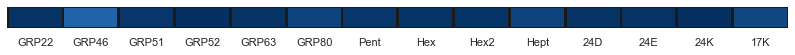

AA


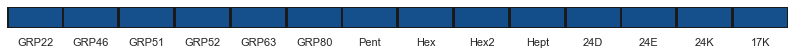

NN


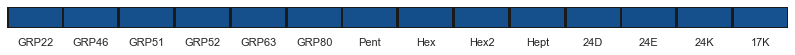

S


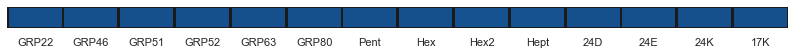

In [30]:
classes = []
for class_name in small_mol_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
small_mol_fluor_data_x_val = small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1)
vmin = small_mol_fluor_data_x_val.values.min()
vmax = small_mol_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(small_mol_fluor_data.shape[0])
                     if small_mol_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(small_mol_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=small_mol_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 features

Fatty acid


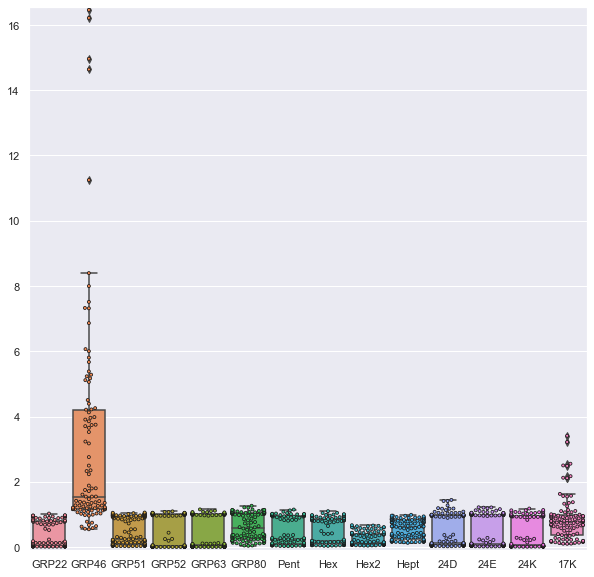

Amino acid


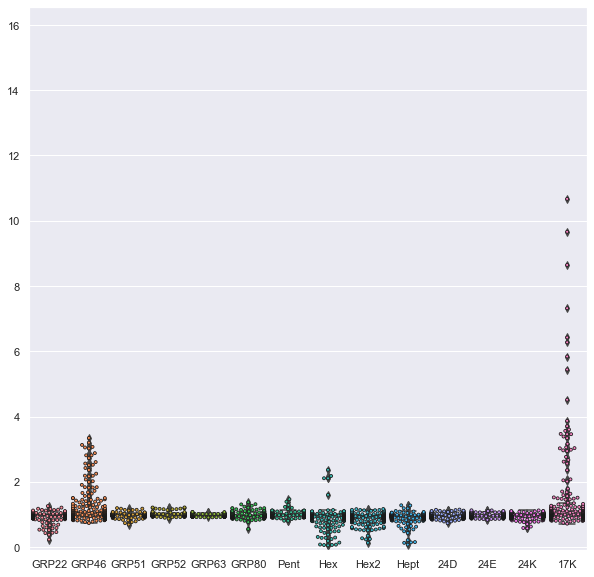

Nucleobases / nucleosides


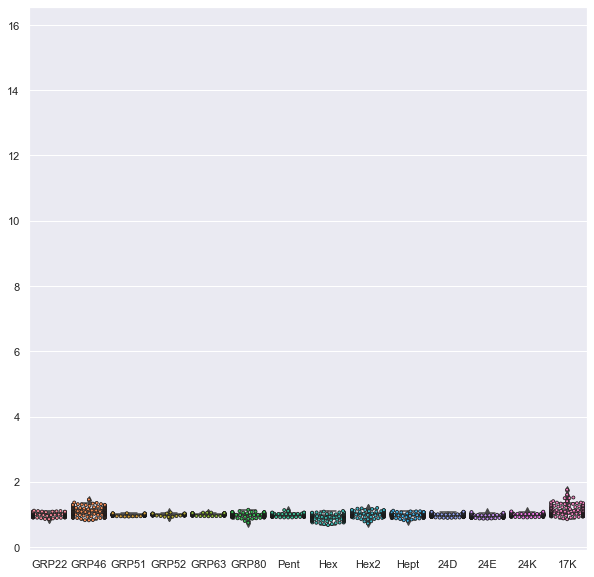

Sugars


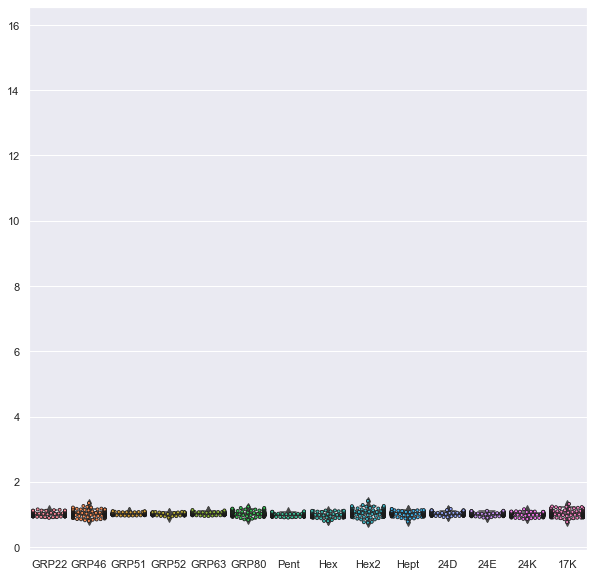

In [31]:
ymin = small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1).min().min() - 0.1
ymax = small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1).max().max() + 0.1

fa_indices = [int(i) for i in range(small_mol_fluor_data.shape[0])
              if small_mol_fluor_data['Analyte'][i] == 'FA']
aa_indices = [int(i) for i in range(small_mol_fluor_data.shape[0])
              if small_mol_fluor_data['Analyte'][i] == 'AA']
nn_indices = [int(i) for i in range(small_mol_fluor_data.shape[0])
              if small_mol_fluor_data['Analyte'][i] == 'NN']
sugar_indices = [int(i) for i in range(small_mol_fluor_data.shape[0])
                 if small_mol_fluor_data['Analyte'][i] == 'S']

sns.set(rc={'figure.figsize':(10,10)})
print('Fatty acid')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=small_mol_fluor_data.iloc[fa_indices])
sns.swarmplot(data=small_mol_fluor_data.iloc[fa_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Amino acid')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=small_mol_fluor_data.iloc[aa_indices])
sns.swarmplot(data=small_mol_fluor_data.iloc[aa_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Nucleobases / nucleosides')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=small_mol_fluor_data.iloc[nn_indices])
sns.swarmplot(data=small_mol_fluor_data.iloc[nn_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Sugars')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=small_mol_fluor_data.iloc[sugar_indices])
sns.swarmplot(data=small_mol_fluor_data.iloc[sugar_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [32]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

First split the data into a training and test set

In [33]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/'
                'All_small_molecules/Small_molecule_ML_results/',
    fluor_data=small_mol_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/All_small_molecules/Small_molecule_ML_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/All_small_molecules/Small_molecule_ML_results/?y


In [34]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

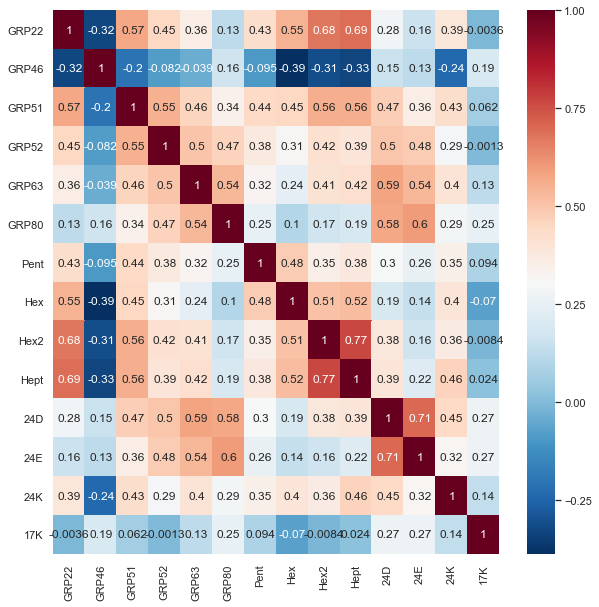

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
GRP22,1.000000,-0.322916,0.572882,0.450822,0.358280,0.125156,0.427505,0.547821,0.676861,0.691439,0.283335,0.157695,0.387802,-0.003602
GRP46,-0.322916,1.000000,-0.204902,-0.082345,-0.039297,0.164176,-0.094523,-0.387816,-0.308428,-0.332210,0.153133,0.125605,-0.236649,0.192749
GRP51,0.572882,-0.204902,1.000000,0.551435,0.457964,0.342551,0.442620,0.451399,0.558993,0.557223,0.474821,0.357081,0.427237,0.062165
GRP52,0.450822,-0.082345,0.551435,1.000000,0.504735,0.467398,0.375790,0.314596,0.417979,0.394001,0.500092,0.484160,0.294557,-0.001280
GRP63,0.358280,-0.039297,0.457964,0.504735,1.000000,0.538124,0.324961,0.240891,0.406349,0.422564,0.587723,0.537805,0.401305,0.126799
GRP80,0.125156,0.164176,0.342551,0.467398,0.538124,1.000000,0.247961,0.102063,0.169865,0.190798,0.575255,0.603631,0.285845,0.247646
Pent,0.427505,-0.094523,0.442620,0.375790,0.324961,0.247961,1.000000,0.481253,0.349992,0.378480,0.302916,0.255921,0.347879,0.094150
Hex,0.547821,-0.387816,0.451399,0.314596,0.240891,0.102063,0.481253,1.000000,0.508263,0.521697,0.192243,0.142253,0.398132,-0.070159
Hex2,0.676861,-0.308428,0.558993,0.417979,0.406349,0.169865,0.349992,0.508263,1.000000,0.769313,0.384417,0.162457,0.360426,-0.008431
Hept,0.691439,-0.332210,0.557223,0.394001,0.422564,0.190798,0.378480,0.521697,0.769313,1.000000,0.394658,0.215161,0.464164,0.023522


In [35]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

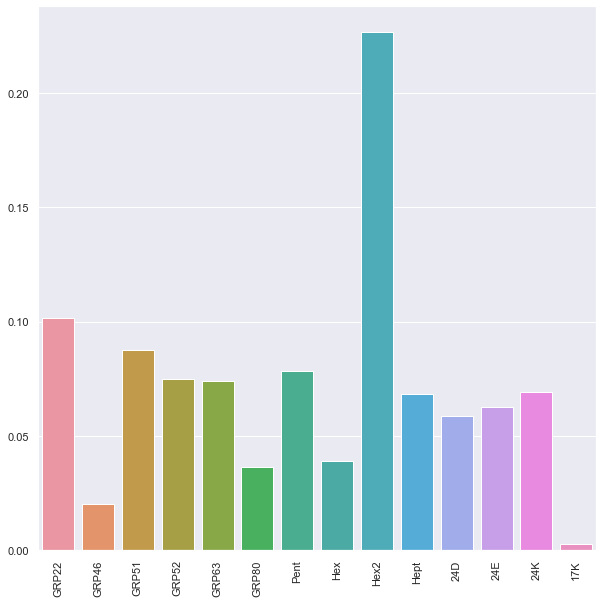

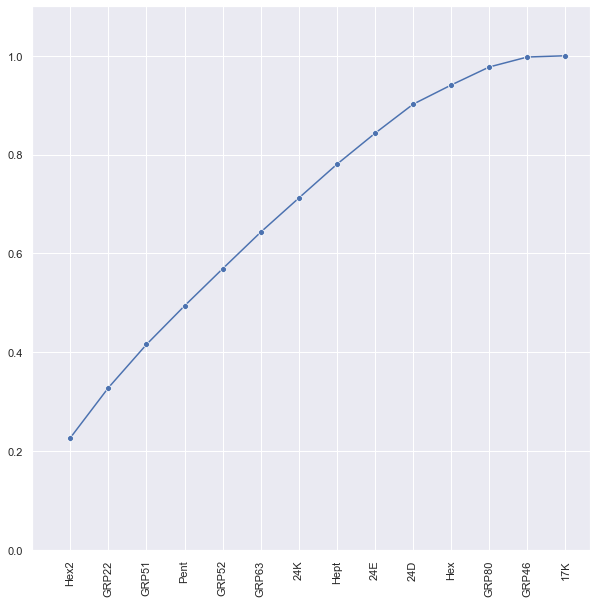

,Feature,Score
0,Hex2,0.226713
1,GRP22,0.101432
2,GRP51,0.087555
3,Pent,0.078231
4,GRP52,0.075043
5,GRP63,0.074089
6,24K,0.069010
7,Hept,0.068318
8,24E,0.062676
9,24D,0.058830


In [36]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

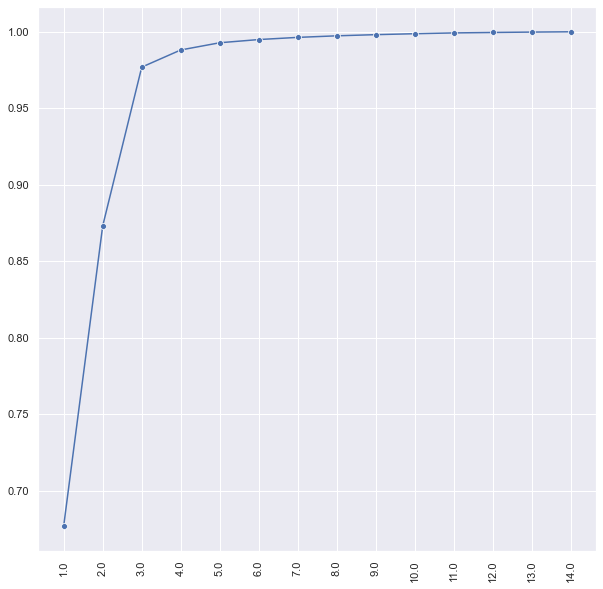

In [37]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [38]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [39]:
pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,-0.128207,0.914997,-0.107304,-0.131006,-0.129893,-0.062787,-0.116376,-0.118841,-0.125734,-0.091426,-0.114595,-0.118077,-0.122945,-0.053181
2,-0.005143,0.086699,0.016898,0.018894,0.020830,0.026243,0.034921,0.056947,-0.007440,-0.001757,0.033427,0.033949,0.008317,0.991883
3,0.284006,0.390263,0.273487,0.277950,0.274938,0.258643,0.250473,0.225312,0.273799,0.190254,0.280294,0.274853,0.290746,-0.095866
4,-0.174536,-0.027535,0.055822,0.196729,0.214043,0.258547,0.099002,-0.513307,-0.554109,-0.314351,0.215464,0.281394,0.097124,-0.010967
5,-0.046869,0.006648,-0.098027,0.000659,0.002150,-0.003645,0.119342,0.785046,-0.532988,-0.260178,0.004916,0.018978,0.050130,-0.054083
6,-0.022984,-0.008732,0.096427,-0.182984,-0.158861,0.093761,-0.284028,-0.006442,-0.442801,0.761103,0.171477,-0.002746,0.192590,0.004439
7,0.477857,0.033205,0.185219,0.152454,0.058266,-0.694166,0.221747,-0.170068,-0.285435,0.047410,-0.200925,-0.045552,0.152210,0.017612
8,-0.114965,0.016159,-0.199422,-0.092138,0.077326,-0.487837,-0.433058,0.047632,0.156312,-0.189665,0.556852,0.235738,0.280047,-0.001407
9,-0.701672,0.013366,0.019192,-0.058053,0.036840,-0.278266,0.566556,-0.004344,0.095078,0.219556,-0.011604,-0.010183,0.214873,-0.017096


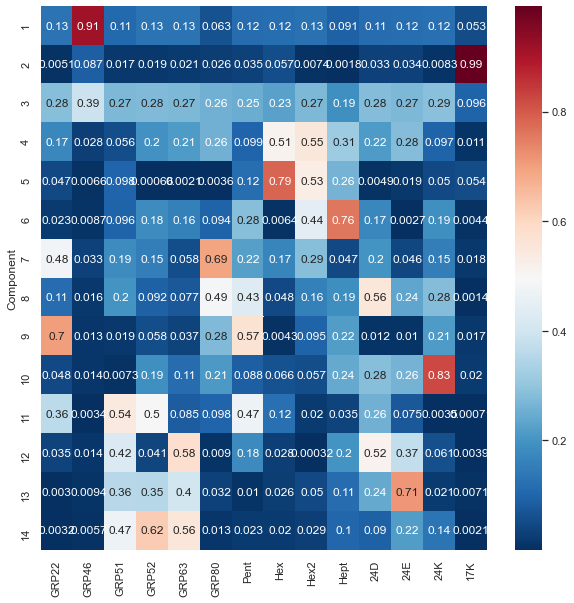

In [40]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [41]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [42]:
relative_pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.053214,0.592393,0.037701,0.046511,0.047986,0.024850,0.040183,0.054299,0.047799,0.033007,0.038454,0.044311,0.050071,0.041531
2,0.002134,0.056131,0.005937,0.006708,0.007695,0.010387,0.012058,0.026019,0.002828,0.000634,0.011217,0.012740,0.003387,0.774595
3,0.117879,0.252666,0.096088,0.098681,0.101569,0.102366,0.086486,0.102945,0.104088,0.068687,0.094057,0.103146,0.118410,0.074865
4,0.072443,0.017827,0.019613,0.069845,0.079073,0.102328,0.034184,0.234532,0.210652,0.113490,0.072302,0.105600,0.039555,0.008564
5,0.019453,0.004304,0.034441,0.000234,0.000794,0.001443,0.041207,0.358690,0.202622,0.093932,0.001650,0.007122,0.020416,0.042235
6,0.009540,0.005653,0.033879,0.064965,0.058687,0.037109,0.098072,0.002943,0.168336,0.274781,0.057542,0.001030,0.078435,0.003467
7,0.198339,0.021498,0.065076,0.054126,0.021525,0.274738,0.076567,0.077705,0.108512,0.017116,0.067423,0.017095,0.061990,0.013754
8,0.047717,0.010462,0.070066,0.032712,0.028566,0.193077,0.149530,0.021763,0.059424,0.068475,0.186860,0.088467,0.114053,0.001099
9,0.291236,0.008653,0.006743,0.020611,0.013610,0.110133,0.195626,0.001985,0.036145,0.079266,0.003894,0.003821,0.087510,0.013351


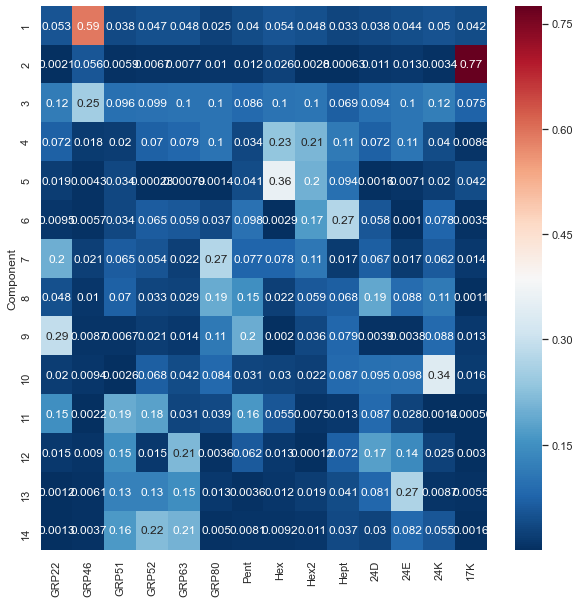

In [43]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

In [44]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

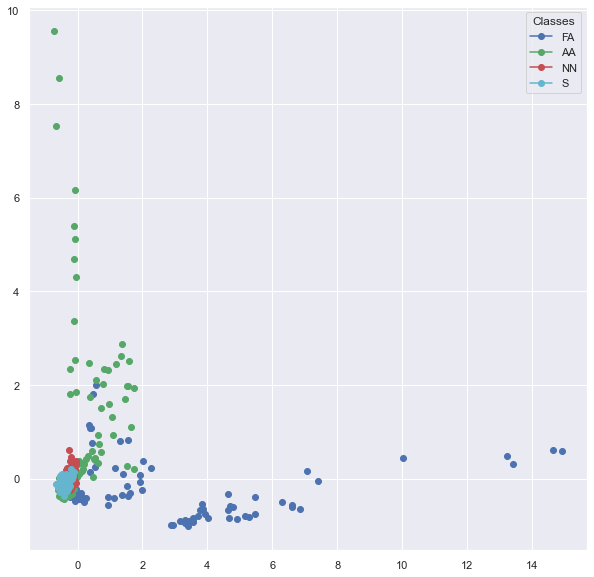

In [45]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['FA', 'AA', 'NN', 'S'], results_dir=ml.results_dir,
    plot_id='All_data_2D'
)

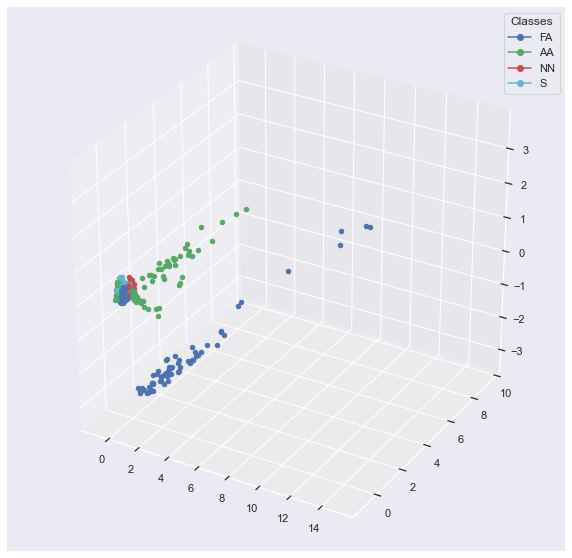

In [46]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['FA', 'AA', 'NN', 'S'], results_dir=ml.results_dir,
    plot_id='All_data_3D'
)

~98% of the variation in the data can be accounted for with 4 features, so will transform the data to 4 (rather than 14) dimensions

In [47]:
n_components = 4

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised, in combination with 5 different methods of dealing with imbalanced classes. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation from 14 to 4 dimensions using PCA
- resampling the data
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [48]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing', 'max_sampling', 'smote', 'smoteenn', 'smotetomek']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_f1_score': [],
                          'Mean_f1_score': [],
                          'Std_dev_f1_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_f1_score'].append(spot_check.best_score_)
        score_dict['Mean_f1_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_f1_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 316.22776601683796}
Best score: 0.5889404613641495


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 100.0}
Best score: 0.6963279871574983


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 1.0}
Best score: 0.6801336175478642


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10000.0}
Best score: 0.6402443029172545
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10.0}
Best score: 0.6797786791794422






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 316.22776601683796}
Best score: 0.5889404613641495
All parameter combinations tested:
1 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0.0031622776601683794} nan
2 {'Logistic

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 7}
Best score: 0.7059725897344624
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 8}
Best score: 0.7211403328959243
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 5}
Best score: 0.7043974140185991
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 3}
Best score: 0.6870808773489929
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighb

Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.49293848583165617
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.5076032212257668
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.4993521071018761
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.4992990941234797






GaussianNB: no_balancing
Best parameters: {}
Best score: 0.48044837997492396
All parameter combinations tested:
1 {} 0.48






GaussianNB: max_sampling
Best parameters: {}
Best score: 0.49293848583165617
All parameter combinations tested:
1 {} 0.493






GaussianNB: smote
Best parameters: {}
Best score: 0.5076032212257668
All parameter combinations tested:
1 {} 0.508






GaussianNB: smoteenn
Best parameters: {}
Best score: 0.4993521071018761
All parameter combinations tested:
1 {} 0.499






GaussianNB: smotetomek
Best parameters: {}
Best score: 0.4992990941234797
All parameter com

In [49]:
score_df

,Algorithm,Resampling_method,Best_params,Best_f1_score,Mean_f1_score,Std_dev_f1_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'sag', 'Logisti...",0.588940,0.519662,0.038854
1,LogisticRegression,max_sampling,"{'LogisticRegression__solver': 'saga', 'Logist...",0.696328,0.674052,0.032122
2,LogisticRegression,smote,"{'LogisticRegression__solver': 'saga', 'Logist...",0.680134,0.603585,0.027652
3,LogisticRegression,smoteenn,"{'LogisticRegression__solver': 'sag', 'Logisti...",0.640244,0.582822,0.034991
4,LogisticRegression,smotetomek,"{'LogisticRegression__solver': 'lbfgs', 'Logis...",0.679779,0.631376,0.030850
5,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'uniform', '...",0.705973,0.628894,0.035528
6,KNeighborsClassifier,max_sampling,"{'KNeighborsClassifier__weights': 'uniform', '...",0.721140,0.688755,0.036680
7,KNeighborsClassifier,smote,"{'KNeighborsClassifier__weights': 'distance', ...",0.704397,0.668365,0.026475
8,KNeighborsClassifier,smoteenn,"{'KNeighborsClassifier__weights': 'distance', ...",0.687081,0.638774,0.033103
9,KNeighborsClassifier,smotetomek,"{'KNeighborsClassifier__weights': 'distance', ...",0.707968,0.684275,0.017893


So, from this spot check, **support vector classifier with radial basis function  kernel**, with class rebalancing using **max_balancing** does a good job.

So, run hyperparameter optimisation for SVC.

In [51]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)  # Actual number of x samples
# will be different owing to oversampling, but don't want to hard code this selection into the pipeline, so for
# now this estimate will do to define the ranges of values to test for some of the hyperparameter values

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='random search', fixed_params=fixed_params, tuned_params=random_tuned_params,
    train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=['max_sampling'], n_iter='',
    cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.1767766952966369, 'SVC__C': 64.0}
Best score: 0.7509723204233169


In [52]:
grid_tuned_params = {'gamma': np.linspace(0.01, 1, 100),
                     'C': np.linspace(1, 100, 100)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='grid search', fixed_params=fixed_params, tuned_params=grid_tuned_params,
    train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=['max_sampling'], n_iter='',
    cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 85.0, 'SVC__gamma': 0.28}
Best score: 0.7799263349717803


### So, optimal hyperparameter combination:
- C = 85
- gamma = 0.28

Model cross-validation score: [0.78216575 0.72675121 0.76648023 0.76532467 0.7328594 ]
accuracy_score: 0.7068965517241379
recall_score: 0.7345287426458534
precision_score: 0.7084555966908908
f1_score: 0.7184413287861563
cohen_kappa_score: 0.583790628957366
None


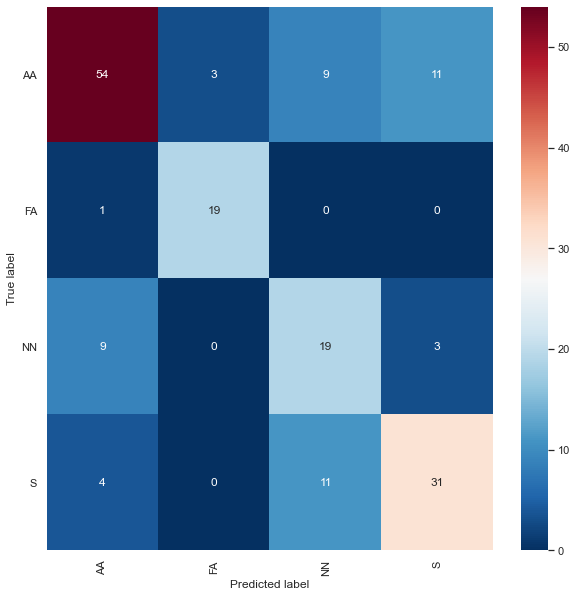

true


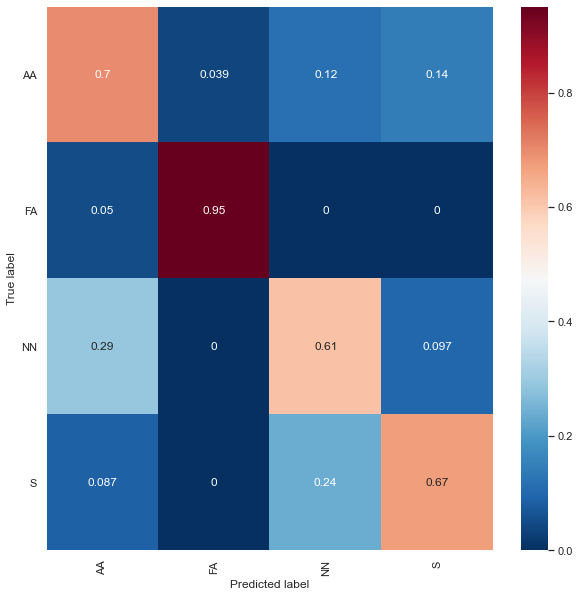

pred


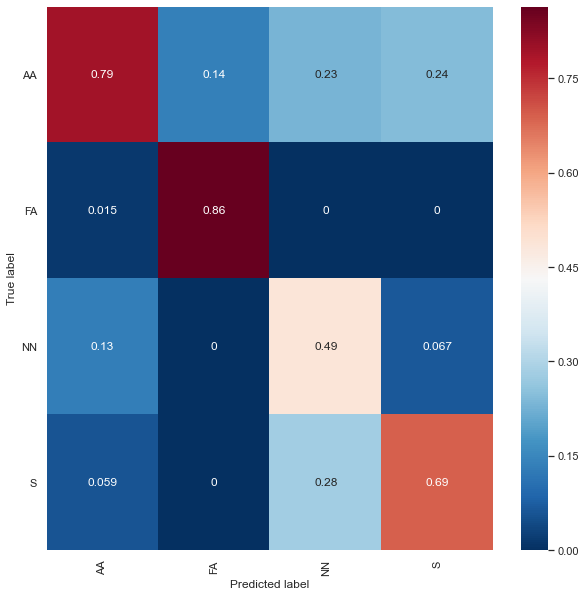

In [53]:
final_params = {'C': 85,
                'gamma': 0.28}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='train', fixed_params=fixed_params, tuned_params=final_params,
    train_scoring_func='f1_macro', test_scoring_funcs=scoring_funcs, resampling_method=['max_sampling'],
    n_iter=n_iter, cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

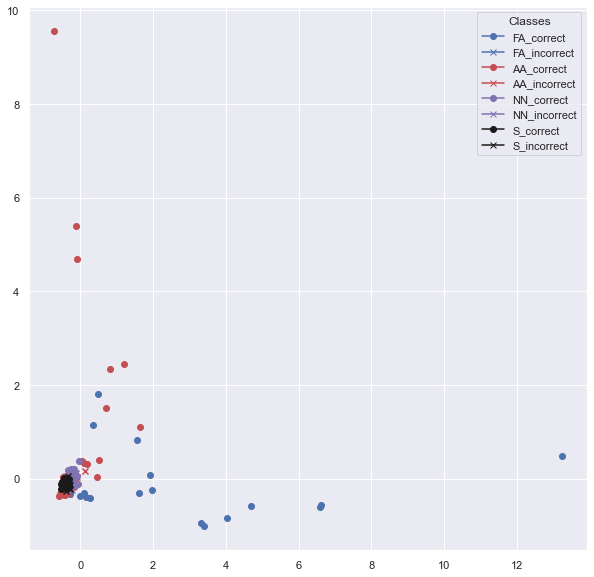

In [57]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['FA_correct', 'FA_incorrect', 'AA_correct', 'AA_incorrect', 'NN_correct', 'NN_incorrect',
                'S_correct', 'S_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)